In [3]:
from lab4_func import optical_flow, vis_of, pyramid
import cv2
import matplotlib.pyplot as plt

In [9]:
cm_gt = cv2.imread("cm_gt.png", 0)
cm1 = cv2.imread("cm1.png", 0)
cm2 = cv2.imread("cm2.png", 0)
I = cv2.imread("I.jpg", 0)
J = cv2.imread("J.jpg", 0)

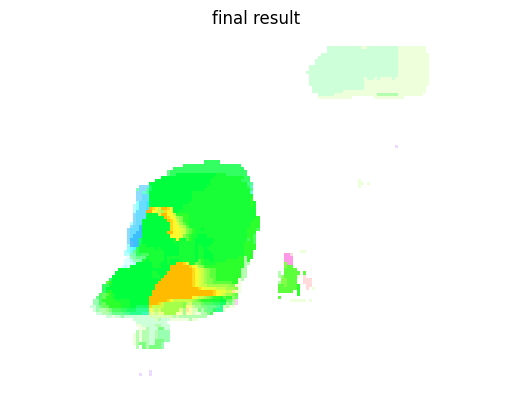

In [10]:

wSize = 11
dW = wSize // 2
dX = 5
dY = 5
img_I = cv2.resize(I, (I.shape[1] // 2, I.shape[0] // 2))
img_J = cv2.resize(J, (J.shape[1] // 2, J.shape[0] // 2))
u, v = optical_flow(img_I, img_J, dW, dX, dY)
vis_of(u, v, "final result")


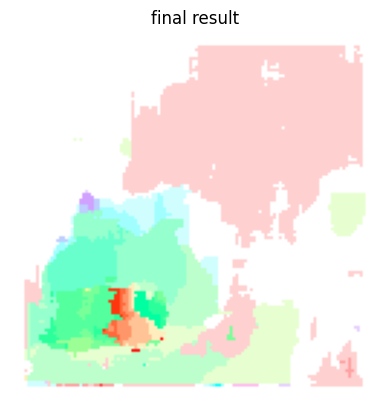

In [16]:
img_I = cv2.resize(cm1, (cm1.shape[1] // 2, cm1.shape[0] // 2))
img_J = cv2.resize(cm2, (cm2.shape[1] // 2, cm2.shape[0] // 2))
u, v = optical_flow(img_I, img_J, dW, dX, dY)
vis_of(u, v, "final result")

## Piramida

In [ ]:
from lab4_func import optical_flow, vis_of, pyramid
import cv2
import matplotlib.pyplot as plt
from copy import copy
import numpy as np

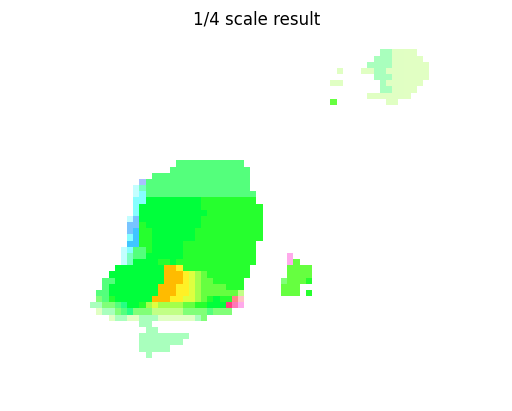

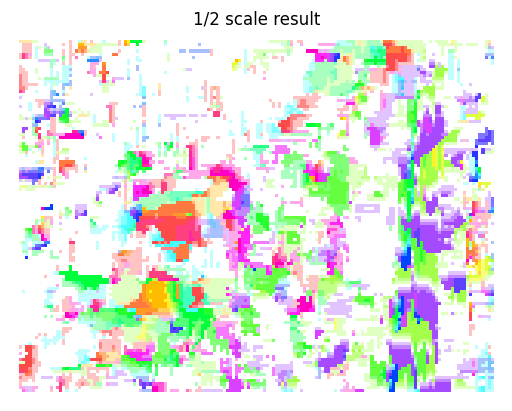

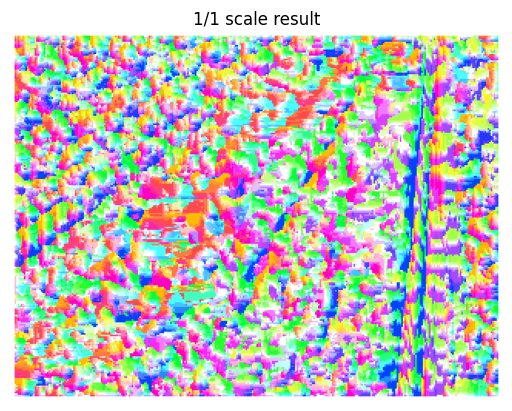

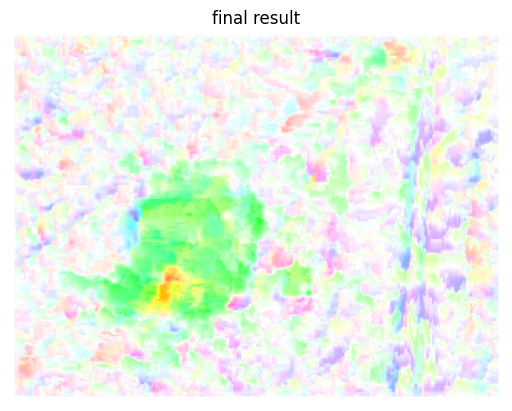

In [3]:
def pyramid_flow(img_I, img_J, dW, dX, dY, scale):
    I_pyramid = pyramid(img_I, scale)
    J_pyramid = pyramid(img_J, scale)
    result_u = np.zeros(img_I.shape)
    result_v = np.zeros(img_J.shape)
    # Pętla po skalach
    I = I_pyramid[-1]
    for i in range(scale-1,-1,-1):
        Jp = J_pyramid[i]
        u, v = optical_flow(I, Jp, dW, dX, dY)
        vis_of(u, v, f"1/{2 ** (i)} scale result")
        I_new = copy(I)
        YY, XX = I_new.shape
        if i:
            for y in range(YY):
                for x in range(XX):
                    new_y = int(y + v[y, x])
                    new_x = int(x + u[y, x])
                    if new_y >= 0 and y < YY and new_x >= 0 and new_x < XX:
                        I_new[new_y, new_x] = I[y, x]
                    
            I = cv2.resize(I_new, (0, 0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

        result_u += cv2.resize(u, img_I.shape[::-1]) * 2**(i)
        result_v += cv2.resize(v, img_I.shape[::-1]) * 2**(i)

    return result_u, result_v


I = cv2.imread("I.jpg", 0)
J = cv2.imread("J.jpg", 0)

# img_I = cv2.resize(I, (I.shape[1] // 2, I.shape[0] // 2))
# img_J = cv2.resize(J, (J.shape[1] // 2, J.shape[0] // 2))

dW = 3
dX = 3
dY = 3
scale = 3
u, v = pyramid_flow(I, J, dW, dX, dY, scale)
vis_of(u, v, "final result")



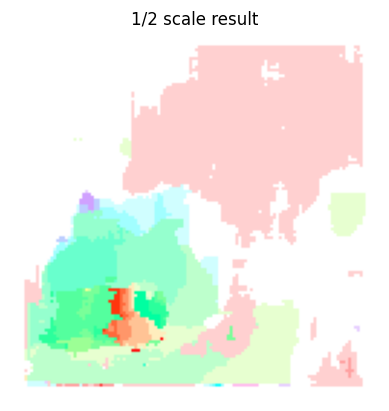

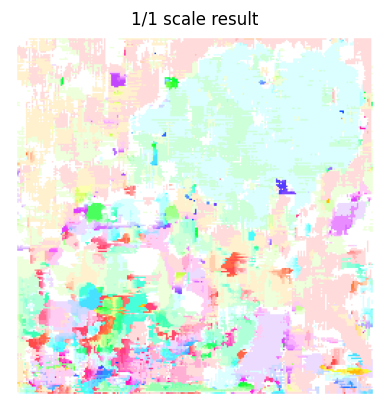

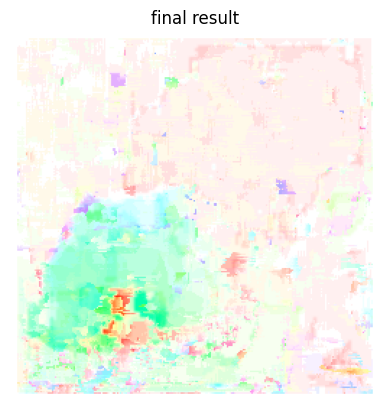

In [4]:
I = cv2.imread("cm1.png", 0)
J = cv2.imread("cm2.png", 0)

# img_I = cv2.resize(I, (I.shape[1] // 2, I.shape[0] // 2))
# img_J = cv2.resize(J, (J.shape[1] // 2, J.shape[0] // 2))

dW = 5
dX = 5
dY = 5
scale = 2
u, v = pyramid_flow(I, J, dW, dX, dY, scale)
vis_of(u, v, "final result")